In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
import plotly.offline as py
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from wrangle import get_assessment_users

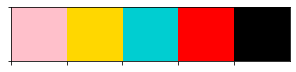

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']

# Set your custom color palette
my_pal = sns.color_palette(heat)

sns.palplot(my_pal)

# Read In df

In [3]:
df = pd.read_csv('df_types.csv')

In [4]:
df = df.sort_values(by='date')

In [5]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
5419024,1325467d,e9863be110886d86,2019-07-23 22:06:28.637000+00:00,"{""coordinates"":{""x"":858,""y"":642,""stage_width"":...",f90e8b6e,6,4070,5888,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday
5418827,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:05:51.082000+00:00,"{""weight"":1,""source"":""resources"",""resources"":[...",f90e8b6e,147,4030,116609,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday
5418828,2230fab4,cebbc7dcfae8cffa,2019-07-23 17:05:51.783000+00:00,"{""description"":""That's not enough food. Try pu...",f90e8b6e,148,3120,117309,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday
5418829,4ef8cdd3,cebbc7dcfae8cffa,2019-07-23 17:05:52.815000+00:00,"{""weight"":1,""correct"":true,""scale_weight"":1,""s...",f90e8b6e,149,4020,118342,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday
5418830,0330ab6a,cebbc7dcfae8cffa,2019-07-23 17:05:53.252000+00:00,"{""description"":""That's not enough food. Try pu...",f90e8b6e,150,3020,118775,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday


In [6]:
df.shape

(5574092, 18)

# Games-Only df

- 25,488 game_times with 0 values

- all of the above observations have event_codes of 2000, start event

- I will look at all of the event codes that have 0 game_time values to see if I want to drop those rows.

In [57]:
games_df = df[df.type == 'Game']
(games_df[games_df.game_time == 0]).event_code.value_counts()

Series([], Name: event_code, dtype: int64)

In [8]:
games_df.shape

(2782034, 18)

## Drop event_code rows with 0 value in game_time

In [9]:
(df[df.game_time == 0]).event_code.value_counts()

2000    126135
3010      7519
2020      3051
2025       227
4070        14
Name: event_code, dtype: int64

In [10]:
df = df[df.game_time != 0]

In [11]:
(df[df.game_time == 0]).event_code.value_counts()

Series([], Name: event_code, dtype: int64)

# Create median accuracy col

In [12]:
median = df.groupby('installation_id')[['accuracy']].median()

In [13]:
median

,accuracy
installation_id,
0006a69f,0.500000
0006c192,0.000000
001d0ed0,0.500000
002db7e3,0.090909
003372b0,0.500000
004c2091,1.000000
00634433,1.000000
00667b88,1.000000
00691033,0.000000


In [14]:
df = df.merge(median, on='installation_id', how='left')

In [15]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy_x,accuracy_group,date,hour,weekday,accuracy_y
0,1325467d,e9863be110886d86,2019-07-23 22:06:28.637000+00:00,"{""coordinates"":{""x"":858,""y"":642,""stage_width"":...",f90e8b6e,6,4070,5888,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333
1,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:05:51.082000+00:00,"{""weight"":1,""source"":""resources"",""resources"":[...",f90e8b6e,147,4030,116609,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333


In [16]:
df.shape

(5437146, 19)

In [17]:
df.rename(columns={'accuracy_x': 'accuracy', 'accuracy_y': 'median'}, inplace=True)

In [18]:
df.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median
0,1325467d,e9863be110886d86,2019-07-23 22:06:28.637000+00:00,"{""coordinates"":{""x"":858,""y"":642,""stage_width"":...",f90e8b6e,6,4070,5888,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333


# Create game_mins Col 

- with game_time converted to minutes

In [19]:
df['game_mins'] = df.game_time / 60_000

In [20]:
df.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median,game_mins
0,1325467d,e9863be110886d86,2019-07-23 22:06:28.637000+00:00,"{""coordinates"":{""x"":858,""y"":642,""stage_width"":...",f90e8b6e,6,4070,5888,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333,0.098133


# Create df with max game_time by game_session

In [21]:
game_time_group = df.groupby(['installation_id', 'game_session','type','date', 'weekday'])[['game_mins']].max().reset_index()

In [22]:
game_time_group.head(5)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133
2,0006a69f,0721802df0531701,Game,2019-08-29,Thursday,2.788950
3,0006a69f,1623f262016185e4,Game,2019-08-06,Tuesday,1.341283
4,0006a69f,203959bf44d06632,Game,2019-08-29,Thursday,2.459233


In [23]:
game_time_group.shape

(59977, 6)

In [24]:
game_time_group.describe()

,game_mins
count,59977.000000
mean,3.244713
std,34.680020
min,0.000317
25%,0.660550
50%,1.355833
75%,2.555183
max,5115.170817


# Total Minutes of game_time by User

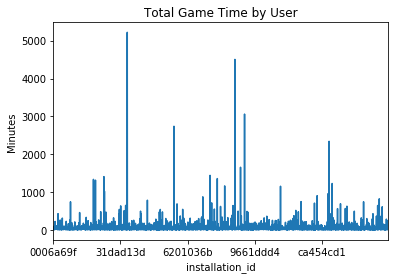

In [25]:
game_time_group.groupby('installation_id').game_mins.sum().plot()

plt.title('Total Game Time by User')
plt.ylabel('Minutes')
plt.show()

In [26]:
# This is the tallest peak above in milliseconds

print(f"The tall peak above is a user with {game_time_group.groupby('installation_id').game_mins.sum().max() / 60} total hours of game time.")
      

The tall peak above is a user with 86.9816925 total hours of game time.


## Which weekday has the highest game_time?

In [53]:
game_time_group.groupby('weekday')[['game_mins']].sum().sort_values(by='game_mins', ascending=False)

,game_mins
weekday,
Thursday,31671.063717
Monday,31254.642917
Wednesday,27715.328300
Friday,27269.645783
Tuesday,26805.873883
Sunday,24955.951733
Saturday,24935.647983


Text(0, 0.5, 'Time in Milliseconds')

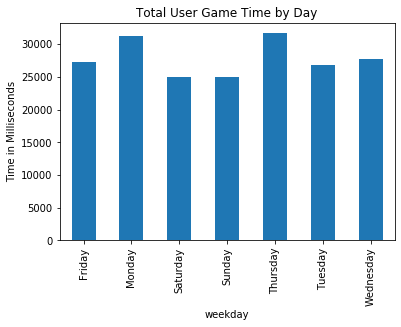

In [28]:
game_time_group.groupby('weekday').game_mins.sum().plot(kind='bar')

plt.title('Total User Game Time by Day')
plt.ylabel('Time in Milliseconds')

## Which weekday has the most users logging in?

In [29]:
game_time_group.groupby('weekday').installation_id.nunique().sort_values(ascending=False)

weekday
Friday       1085
Thursday     1049
Monday        985
Wednesday     973
Tuesday       971
Saturday      919
Sunday        872
Name: installation_id, dtype: int64

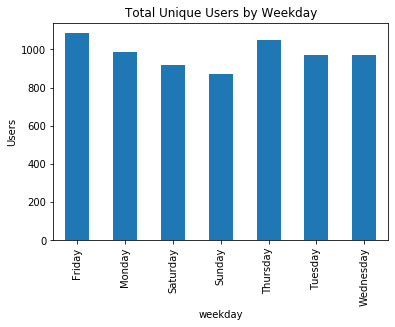

In [30]:
game_time_group.groupby('weekday').installation_id.nunique().plot(kind='bar')

plt.title('Total Unique Users by Weekday')
plt.ylabel('Users')
plt.show()

# How much time are users spending by type?

## Games

In [31]:
games_df = game_time_group[game_time_group.type == 'Game']
games_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
2,0006a69f,0721802df0531701,Game,2019-08-29,Thursday,2.788950


In [32]:
print(f'Users are spending a total of {games_df.game_mins.sum()} minutes playing games.')

Users are spending a total of 97229.9732 minutes playing games.


## Activities

In [33]:
activities_df = game_time_group[game_time_group.type == 'Activity']
activities_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133
5,0006a69f,239576a91af9fd4d,Activity,2019-08-09,Friday,1.834167


In [34]:
print(f'Users are spending a total of {activities_df.game_mins.sum()} minutes playing activities.')

Users are spending a total of 76370.12865 minutes playing activities.


## Assessments

In [35]:
assessments_df = game_time_group[game_time_group.type == 'Assessment']
assessments_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
15,0006a69f,6bdf9623adc94d89,Assessment,2019-08-06,Tuesday,0.447117
18,0006a69f,77b8ee947eb84b4e,Assessment,2019-08-06,Tuesday,1.546650


In [36]:
print(f'Users are spending a total of {assessments_df.game_mins.sum()} minutes taking assessments.')

Users are spending a total of 21008.052466666668 minutes taking assessments.


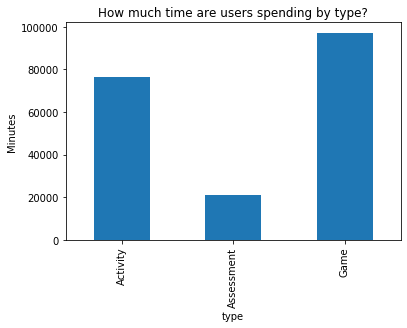

In [55]:
game_time_group.groupby('type').game_mins.sum().plot(kind='bar')

plt.title('How much time are users spending by type?')
plt.ylabel('Minutes')
plt.show()

In [81]:
game_time_group.groupby('type').game_mins.sum()

type
Activity      76370.128650
Assessment    21008.052467
Game          97229.973200
Name: game_mins, dtype: float64

In [56]:
Types=pd.DataFrame()
Types['Type']=game_time_group.groupby('type').game_mins.sum().index
Types['Count']=game_time_group.groupby('type').game_mins.sum().values

py.init_notebook_mode(connected=True)
fig = go.Figure(data=[go.Pie(labels=Types['Type'], values=Types['Count'], hole=0.2)])

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=my_pal, line=dict(color='#000000', width=2)))
fig.show()

# What are the first and last logins?

In [41]:
game_time_group.date.min()

'2019-07-23'

In [42]:
game_time_group.date.max()

'2019-10-14'

# Explore Type

In [59]:
game_time_group.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133


In [60]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median,game_mins
0,1325467d,e9863be110886d86,2019-07-23 22:06:28.637000+00:00,"{""coordinates"":{""x"":858,""y"":642,""stage_width"":...",f90e8b6e,6,4070,5888,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333,0.098133
1,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:05:51.082000+00:00,"{""weight"":1,""source"":""resources"",""resources"":[...",f90e8b6e,147,4030,116609,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333,1.943483


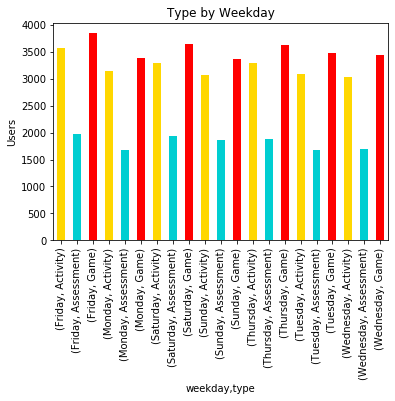

In [86]:
game_time_group.groupby(['weekday', 'type'])['type'].count().plot(kind='bar', label='type', color=my_pal[1:4], legend=False)

plt.title('Type by Weekday')
plt.ylabel('Users')
plt.show()

# Explore titles

In [119]:
game_time_group.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133


## Create the agg df 

In [113]:
agg = game_time_group.groupby(['installation_id', 'type'])[['game_mins']].sum()

In [115]:
agg = agg.reset_index()

In [116]:
game_mins = agg.pivot(index='installation_id', columns='type', values='game_mins')

## Fill NaN with 0 from the game_mins df

In [118]:
game_mins.fillna(value=0, inplace=True)

In [121]:
game_mins.head(2)

type,Activity,Assessment,Game
installation_id,,,
0006a69f,53.32825,3.334350,35.655483
0006c192,20.17550,1.778117,8.834550


In [122]:
game_mins.columns

Index(['Activity', 'Assessment', 'Game'], dtype='object', name='type')

In [131]:
game_mins = game_mins.reset_index()

In [135]:
game_mins.columns = ['installation_id', 'activity_mins', 'assessment_mins', 'game_mins']

In [137]:
game_mins.head()

,installation_id,activity_mins,assessment_mins,game_mins
0,0006a69f,53.328250,3.334350,35.655483
1,0006c192,20.175500,1.778117,8.834550
2,001d0ed0,1.538033,2.730433,15.842617
3,002db7e3,38.495617,8.238417,29.399583
4,003372b0,10.097433,3.439900,26.296917


## write game_times csv

In [120]:
game_mins.to_csv('game_mins.csv')